### Simple Authorship Clustering

The texts to be explored are works of fiction of three authors.

**Charles John Huffam Dickens (1812-1870)** – _A Christmas Carol_, _A Tale of Two Cities_, _Great Expectations_

**Jane Austen (1775-1817)** – _Emma_, _Persuasion_, _Pride and Prejudice_

**William Shakespeare (1564-1616)** – _Henry V_, _Macbeth_, _Richard III_

We will first take a look at the length of each text so to measure and visualize the distance of the texts. Then will generate a dendrogram to show the authorship grouping.

#### Getting the files
Gather all the text files in a python list sorted alphabetically by name of the file.

In [1]:
import os
import numpy as np
import sklearn.feature_extraction.text as text

# directory with the downloaded texts
data_dir = 'Fictions/'

filenames = np.array(sorted(os.listdir(data_dir)))

filenames_with_path = [os.path.join(data_dir, fn) for fn in filenames] # join the path with filenames
filenames_with_path

['Fictions/AChristmasCarol_Dickens.txt',
 'Fictions/ATaleofTwoCities_Dickens.txt',
 'Fictions/Emma_Austen.txt',
 'Fictions/GreatExpectations_Dickens.txt',
 'Fictions/HenryV_Shakespeare.txt',
 'Fictions/Macbeth_Shakespeare.txt',
 'Fictions/Persuasion_Austen.txt',
 'Fictions/PrideandPrejudice_Austen.txt',
 'Fictions/Richard3_Shakespeare.txt']

#### Prepare to convert the text documents into a matrix of word tokens ordered alphabetically
Sum up rows to calculate lengths of the texts.

In [2]:
vectorizer = text.CountVectorizer(input='filename')
dtm = vectorizer.fit_transform(filenames_with_path)
vocab = np.array(vectorizer.get_feature_names())

### Calculate lengths
The numbers in a row are word frequency of a document, so sum the numbers to get the word count of each document as shown below.

In [3]:
lengths = np.sum(dtm, axis=1)
from pprint import pprint
pprint(lengths)

matrix([[ 31549],
        [135479],
        [157653],
        [179083],
        [ 28605],
        [ 19700],
        [ 83924],
        [121170],
        [ 33849]], dtype=int64)


## Plotting the lengths of texts

#### Histogram

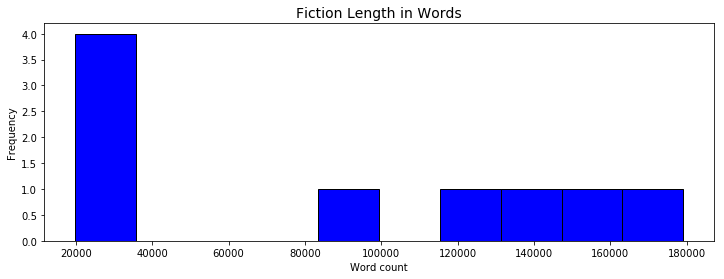

In [4]:
# plot histogragh
import matplotlib.pyplot as plt

# set the canvas area of the line graphs
plt.figure(figsize=(12, 4))

plt.hist(lengths, edgecolor='black',facecolor='blue')

plt.title("Fiction Length in Words", fontsize=14)
plt.xlabel('Word count') # X Axis Label
plt.ylabel('Frequency') # Y Axis Label

plt.show()

### Finding the longest and shortest texts

In [5]:
# find the longest and the shortest texts
longest = (np.max(lengths), filenames[np.argmax(lengths)])

shortest = (np.min(lengths), filenames[np.argmin(lengths)])

print("Longest {} with {} words".format(longest[1], longest[0]))
print("Shortest {} with {} words".format(shortest[1], shortest[0]))

Longest GreatExpectations_Dickens.txt with 179083 words
Shortest Macbeth_Shakespeare.txt with 19700 words


### Measure of distance
#### Multidimensional scaling
Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.

In [6]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(dtm)

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

Extract author names from file name for plotting. Filenames are in the format **`AChristmasCarol_Dickens.txt`** i.e. **`[Book Title]_[Author].txt`**

In [7]:
authors, names = [], []
for fn in filenames:
    author = fn.split('_')[1]
    authors.append(author)
    names.append(fn)
    
authors_unique = sorted(set(authors)) # get unique authors
print(authors_unique)

['Austen.txt', 'Dickens.txt', 'Shakespeare.txt']


### Scatter plot

This is used to expose the correlations and groupings of the texts by authorship.

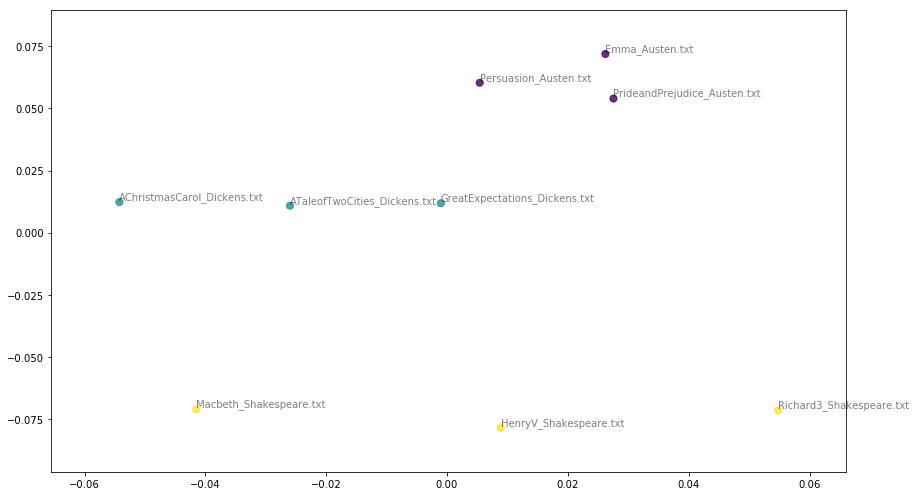

In [8]:
plt.figure(figsize=(12, 7)) 
xs, ys = pos[:, 0], pos[:, 1]

colors = [authors_unique.index(a) for a in authors] # get a unique color for texts of each author  

plt.scatter(xs, ys, c=colors, cmap='viridis', alpha=0.8, s = 50)

for x, y, name in zip(xs, ys, names):
    plt.text(
        x, 
        y, 
        name, 
        ha = 'left', # label text display location horizontally
        va = 'bottom', # label text display location vertically
        alpha=0.5, 
        fontsize=10,
    )
    
# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
# tight_layout: https://matplotlib.org/users/tight_layout_guide.html
plt.tight_layout()
plt.show()

### Dendrogram
A dendrogram is a tree diagram frequently used to illustrate the arrangement of the clusters produced by hierarchical clustering. Here, we will use dendrogram to show the authorship cluster.


In [9]:
# Performs Ward’s linkage on a condensed or redundant distance matrix.
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist)

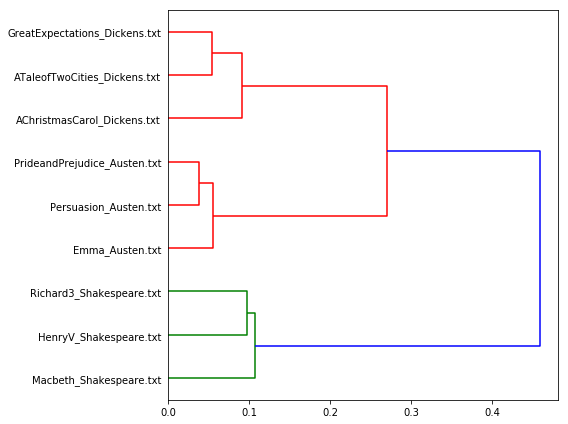

In [10]:
plt.figure(figsize=(8, 6)) 
dendrogram(linkage_matrix, orientation="right", labels=names, leaf_font_size=10)

plt.tight_layout()
plt.show()

#### Reference:  
https://de.dariah.eu/tatom/case_study_racine.html  
https://en.wikipedia.org/wiki/Dendrogram  
http://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling